In [37]:
import os

# Personal libraries
from dataset import get_data_cv
from cv_class import CrossValidation
from XAI_methods import evaluate_XAI

Global seed 0
Global seed 0
Global seed 0
Global seed 0


# Make comparision between GS and Occlusion 

Area under the PR curve: 0.51246 for Residual CNN using gs
Area under the PR curve: 0.71211 for Residual CNN using occlusion


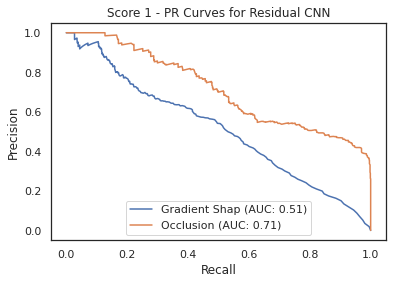

Area under the PR curve: 0.29801 for Residual CNN using gs
Area under the PR curve: 0.51181 for Residual CNN using occlusion


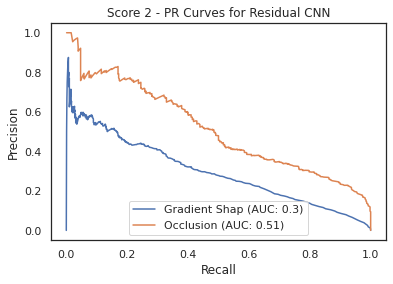

Area under the PR curve: 0.81453 for Residual CNN using gs
Area under the PR curve: 0.83536 for Residual CNN using occlusion


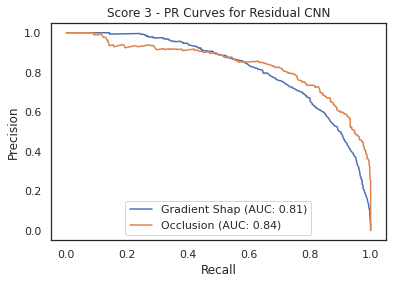

NotADirectoryError: [Errno 20] Not a directory: '/user/ana/S_Source/Simulation3D/experiments/multi_output_3D/analysis/PR-curve/cv_ResidualCNN_AdamW_lr0.001sch_None/AUC_allxai_Score1.png'

In [56]:
# Multi-output
import analysis
import matplotlib.pyplot as plt
model_name = 'cv_ResidualCNN_AdamW_lr0.001sch_None'
save_analysis_path =  os.path.join(base, 'experiments/multi_output_3D/analysis')
analysis_path = os.path.join(base, 'experiments/multi_output_3D/analysis/PR-curve/'+model_name)
xai_path = os.path.join(base, 'experiments/multi_output_3D/weights/no_noise/') # Chosen model
xai_path_noise = os.path.join(base, 'experiments/multi_output_3D/weights/gaussian/') # Chosen model
xai_method = "occlusion"
name="Residual CNN"
output="multi"

for i, (score) in enumerate(os.listdir(analysis_path)):
    save_name = f'AUC_allxai_{score}.png'
    score_path = os.path.join(analysis_path, score)
    p, r, a = [], [], []
    xai_list = ["Gradient Shap","Occlusion"]
    filename = 'no_noise_PR-curve'
    
    for xai in os.listdir(score_path):
        xai_path = os.path.join(score_path, xai)
        
        method1 = name+f' using {xai}'
        precision1, recall1, auc1 = analysis.get_pr_curve(model_name, save_analysis_path, filename + '.json', method1, output, i+1, xai)
        p.append(precision1)
        r.append(recall1)
        a.append(auc1)
    
    for j, (xai_name) in enumerate(xai_list):
        plt.plot(r[j], p[j], label=f'{xai_name} (AUC: {round(a[j], 2)})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Score {i+1} - PR Curves for {name}')
    plt.legend(loc='lower center')
    plot_path = os.path.join(analysis_path, save_name)
    plt.savefig(plot_path, bbox_inches='tight')
    plt.show()
    plt.close()

Area under the PR curve: 0.51196 for CNN using ggc
Area under the PR curve: 0.61642 for CNN using occlusion


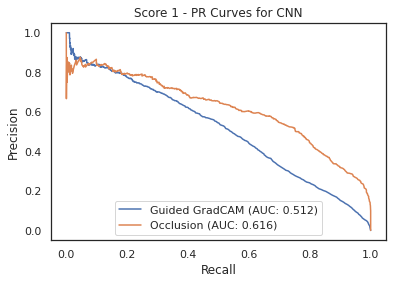

In [50]:
# single-output

import analysis
import matplotlib.pyplot as plt
model_name = 'cv_CNN2_AdamW_lr0.001sch_None'
save_analysis_path =  os.path.join(base, 'experiments/one_output_3D/analysis')
analysis_path = os.path.join(base, 'experiments/one_output_3D/analysis/PR-curve/'+model_name)
xai_path = os.path.join(base, 'experiments/one_output_3D/weights/no_noise/') # Chosen model
xai_path_noise = os.path.join(base, 'experiments/one_output_3D/weights/gaussian/') # Chosen model
name="CNN"
output="one"

save_name = f'AUC_allxai_score1.png'
p, r, a = [], [], []
xai_list = ["Guided GradCAM","Occlusion"]
filename = 'no_noise_PR-curve'

for xai in os.listdir(analysis_path):
    xai_path = os.path.join(analysis_path, xai)

    method1 = name+f' using {xai}'
    precision1, recall1, auc1 = analysis.get_pr_curve(model_name, save_analysis_path, filename + '.json', method1, output, i+1, xai)
    p.append(precision1)
    r.append(recall1)
    a.append(auc1)

for j, (xai_name) in enumerate(xai_list):
    plt.plot(r[j], p[j], label=f'{xai_name} (AUC: {round(a[j], 3)})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Score {i+1} - PR Curves for {name}')
plt.legend(loc='lower center')
plot_path = os.path.join(analysis_path, save_name)
plt.savefig(plot_path, bbox_inches='tight')
plt.show()
plt.close()

## Correlation between XAI methods

In [1]:
import analysis
import os
base = os.getcwd()

# mutli-output
print("Multi output")
model_list = ['cv_CNN2_AdamW_lr0.001sch_None', 'cv_ResidualCNN_AdamW_lr0.001sch_None']
for model_name in model_list:
    print("-> ", model_name)
    xai_path = os.path.join(base, 'experiments/multi_output_3D/weights/no_noise/'+model_name+"/fold5/") # Chosen model
    analysis.map_wise_correlation(model_name, xai_path)

print("------")
print("Single output")
# Single-output
xai_path = os.path.join(base, 'experiments/one_output_3D/weights/no_noise/cv_CNN2_AdamW_lr0.001sch_None/fold5/') # Chosen model
analysis.map_wise_correlation(model_name, xai_path)

Global seed 0
Multi output
->  cv_CNN2_AdamW_lr0.001sch_None
Score: Score1
Score 1: Correlation Coefficient: 0.8462242675668513
Score: Score2
Score 2: Correlation Coefficient: 0.8622040430485945
Score: Score3
Score 3: Correlation Coefficient: 0.90259841144479
->  cv_ResidualCNN_AdamW_lr0.001sch_None
Score: Score1
Score 1: Correlation Coefficient: 0.7210198744052708
Score: Score2
Score 2: Correlation Coefficient: 0.7816820058467597
Score: Score3
Score 3: Correlation Coefficient: 0.8703090440973791
------
Single output
Score: test
Score t: Correlation Coefficient: 0.7973149764960954


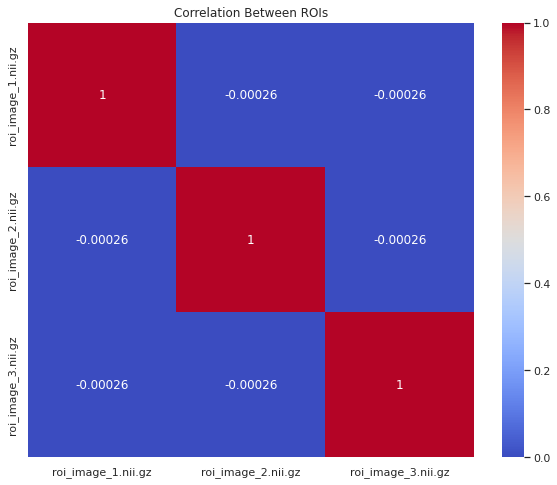

In [13]:
import os
import SimpleITK as sitk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_nii(file_path):
    """
    Load a NIfTI image using SimpleITK.
    """
    image = sitk.ReadImage(file_path)
    return sitk.GetArrayFromImage(image)

def calculate_correlation(matrix):
    """
    Calculate the correlation between each pair of rows in the matrix.
    """
    num_rois = matrix.shape[0]
    correlations = np.zeros((num_rois, num_rois))

    for i in range(num_rois):
        for j in range(num_rois):
            correlations[i, j] = np.corrcoef(matrix[i].flatten(), matrix[j].flatten())[0, 1]

    return correlations

# Set the path to the ROI files
base = os.getcwd()
roi_path = os.path.join(base, "images/")

# Load ROI images
roi_files = [file_name for file_name in os.listdir(roi_path) if file_name.endswith('.nii.gz') and file_name.startswith('roi')]

# Create a new list to store ROIs to keep
filtered_roi_files = []

# Iterate through the original list and keep only specific ROIs
for roi in roi_files:
    if not (roi.startswith("roi_image_0") or roi.startswith("roi_image_v2")):
        filtered_roi_files.append(roi)
num_rois = len(filtered_roi_files)

roi_matrix = np.zeros((num_rois,  # Number of ROIs
                       # Shape of each ROI image (assuming they have the same shape)
                       *load_nii(os.path.join(roi_path, filtered_roi_files[0])).shape))

for i, roi_file in enumerate(filtered_roi_files):
    roi_matrix[i] = load_nii(os.path.join(roi_path, roi_file))

correlation_matrix = calculate_correlation(roi_matrix)

# Visualize the correlation matrix as a heatmap
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=filtered_roi_files, yticklabels=filtered_roi_files)
plt.title('Correlation Between ROIs')
plt.show()


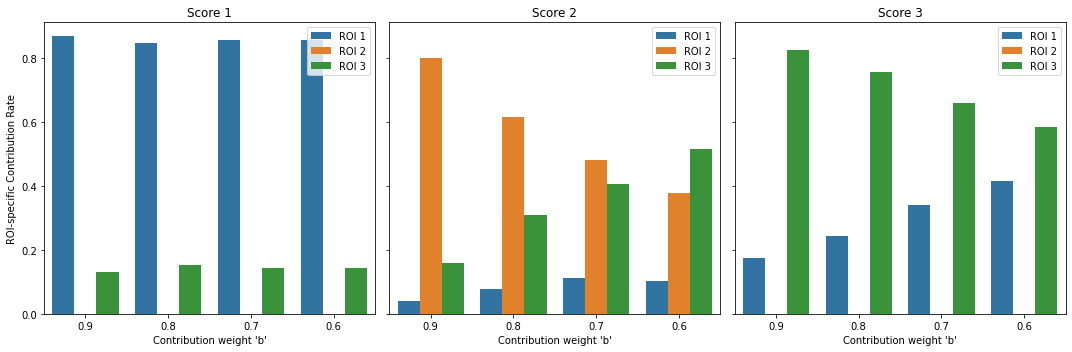

Subplot filename: /user/ana/S_Source/Simulation3D/experiments/ic_multi_output_3D/analysis/RC-rate/All_Scores_Contribution_Rates_Subplot.png


In [40]:
# Your corrected data
import os

data = {
    'Experiment': ['Exp1', 'Exp2', 'Exp3', 'Exp4'],
    'Contribution_Weight': [0.6, 0.7, 0.8, 0.9],
    'Score 1 ROI1': [0.857, 0.857, 0.846, 0.868],
    'Score 1 ROI2': [0.0, 0.0, 0.0, 0.0],
    'Score 1 ROI3': [0.143, 0.143, 0.154, 0.132],
    'Score 2 ROI1': [0.103, 0.111, 0.077, 0.04],
    'Score 2 ROI2': [0.379, 0.481, 0.615, 0.8],
    'Score 2 ROI3': [0.517, 0.407, 0.308, 0.16],
    'Score 3 ROI1': [0.415, 0.341, 0.244, 0.175],
    'Score 3 ROI2': [0.0, 0.0, 0.0, 0.0],
    'Score 3 ROI3': [0.585, 0.659, 0.756, 0.825],
}

df = pd.DataFrame(data)

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# Iterate over each score and create a subplot
for i, score in enumerate(['Score 1', 'Score 2', 'Score 3']):
    # Filter DataFrame for the specific score
    df_score = df[['Experiment', 'Contribution_Weight', f'{score} ROI1', f'{score} ROI2', f'{score} ROI3']]

    # Melt the DataFrame to make it suitable for seaborn
    df_melted = pd.melt(df_score, id_vars=['Experiment', 'Contribution_Weight'], var_name='Metric_ROI', value_name='TP_Rate')

    # Plotting with seaborn
    sns.barplot(x='Contribution_Weight', y='TP_Rate', hue='Metric_ROI', data=df_melted, order=sorted(df['Contribution_Weight'], reverse=True), ax=axes[i], errorbar=None)

    axes[i].set_title(f'{score}')
    axes[i].set_xlabel("Contribution weight 'b'")
    axes[i].set_ylabel('ROI-specific Contribution Rate')

    # Set legend labels
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles, ['ROI 1', 'ROI 2', 'ROI 3'])

# Save the entire subplot
save_dir = os.path.join(os.getcwd(), "experiments/ic_multi_output_3D/analysis/RC-rate/")
os.makedirs(save_dir, exist_ok=True)
subplot_filename = os.path.join(save_dir, 'All_Scores_Contribution_Rates_Subplot.png')
plt.savefig(subplot_filename)

# Adjust layout
plt.tight_layout()
plt.show()

# Print the filename of the saved subplot
print("Subplot filename:", subplot_filename)


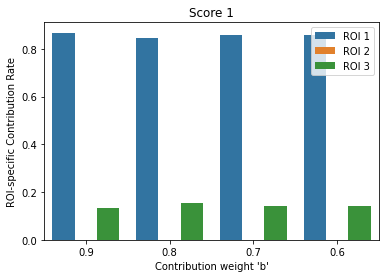

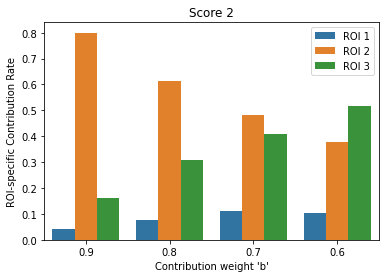

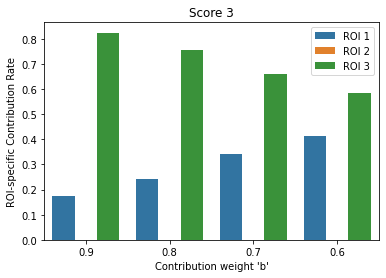

Individual plot filenames: ['Score_1_Contribution_Rates.png', 'Score_2_Contribution_Rates.png', 'Score_3_Contribution_Rates.png']


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Your corrected data
data = {
    'Experiment': ['Exp1', 'Exp2', 'Exp3', 'Exp4'],
    'Contribution_Weight': [0.6, 0.7, 0.8, 0.9],
    'Score 1 ROI1': [0.857, 0.857, 0.846, 0.868],
    'Score 1 ROI2': [0.0, 0.0, 0.0, 0.0],
    'Score 1 ROI3': [0.143, 0.143, 0.154, 0.132],
    'Score 2 ROI1': [0.103, 0.111, 0.077, 0.04],
    'Score 2 ROI2': [0.379, 0.481, 0.615, 0.8],
    'Score 2 ROI3': [0.517, 0.407, 0.308, 0.16],
    'Score 3 ROI1': [0.415, 0.341, 0.244, 0.175],
    'Score 3 ROI2': [0.0, 0.0, 0.0, 0.0],
    'Score 3 ROI3': [0.585, 0.659, 0.756, 0.825],
}

df = pd.DataFrame(data)

# Iterate over each score and create an individual plot
for score in ['Score 1', 'Score 2', 'Score 3']:
    # Filter DataFrame for the specific score
    df_score = df[['Experiment', 'Contribution_Weight', f'{score} ROI1', f'{score} ROI2', f'{score} ROI3']]

    # Melt the DataFrame to make it suitable for seaborn
    df_melted = pd.melt(df_score, id_vars=['Experiment', 'Contribution_Weight'], var_name='Metric_ROI', value_name='TP_Rate')

    # Plotting with seaborn
    plt.figure(figsize=(6, 4))  # Adjust the width and height as needed
    sns.barplot(x='Contribution_Weight', y='TP_Rate', hue='Metric_ROI', data=df_melted, order=sorted(df['Contribution_Weight'], reverse=True), errorbar=None)

    plt.title(f'{score}')
    plt.xlabel("Contribution weight 'b'")
    plt.ylabel('ROI-specific Contribution Rate')

    # Set legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['ROI 1', 'ROI 2', 'ROI 3'])

    # Save individual plot
    save_dir = os.path.join(os.getcwd(), "experiments/ic_multi_output_3D/analysis/RC-rate/")
    os.makedirs(save_dir, exist_ok=True)
    individual_plot_filename = os.path.join(save_dir, f'{score.replace(" ", "_")}_Contribution_Rates.png')
    plt.savefig(individual_plot_filename)

    # Display and close the current figure to start a new one for the next iteration
    plt.show()
    plt.close()

# Print the filenames of the saved plots
print("Individual plot filenames:", [f'{score.replace(" ", "_")}_Contribution_Rates.png' for score in ['Score 1', 'Score 2', 'Score 3']])
